In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [4]:
os.chdir(r"C:\Users\User\Downloads\ml")

In [3]:
os.listdir()

['1st model.ipynb',
 '2. Linear Regression (1).pdf',
 'Banks_full.csv',
 'bank_cleaned.csv',
 'covid19_sample.csv',
 'Crop_Recommendation_Model.ipynb',
 'data',
 'DecisionTreeTheory.ipynb',
 'Diabatic-checkpoint.ipynb',
 'Diabatic.ipynb',
 'DiabeticData.zip',
 'Ensemble-checkpoint.ipynb',
 'Ensemble.ipynb',
 'KC house data.ipynb',
 'LinearRegressionCarSales.ipynb',
 'Loan Data linear reg. SAhil (1) (1).ipynb',
 'LogReg_Default.ipynb',
 'nyc taxi.ipynb',
 'Project 5 car data-checkpoint.ipynb',
 'project work.ipynb',
 'pyplot.rar',
 'sonu Loan Data linear reg. loan data.ipynb',
 'yellow_tripdata_2022-06.parquet']

In [4]:
df=pd.read_csv('covid19_sample.csv')

In [5]:
df.shape

(184155, 12)

In [6]:
df.head(4)

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes


* REMOVING SPECIAL CHARACTER FROM COLUMN NAME

In [7]:
df["Race and ethnicity (combined)"].value_counts(dropna=False)

White, Non-Hispanic                                     75938
Unknown                                                 39585
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Missing                                                  6789
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
NaN                                                         1
Name: Race and ethnicity (combined), dtype: int64

In [8]:
df.rename(columns={"Race and ethnicity (combined)":"Race_ethnicity"},inplace=True)


In [9]:
df1=pd.get_dummies(data=df,columns=["Race_ethnicity"],drop_first=True)

In [10]:
df1.columns=df1.columns.str.replace(" ","_")
df1.columns=df1.columns.str.replace("-","_")
df1.columns=df1.columns.str.replace(",","_")
df1.columns=df1.columns.str.replace("/","_")

-----------------------
* drop 4 clumns
* 'pos_spec_dt','onset_dt' so many missing values are there
* day,month,year is extracted from cdc_report_dt
-----------------------

In [11]:
df1.columns

Index(['Unnamed:_0', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn', 'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Missing', 'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic'],
      dtype='object')

In [12]:
df1.shape

(184155, 19)

In [13]:
obj_num=df1.dtypes[df1.dtypes!='object'].index
obj_var=df1.dtypes[df1.dtypes=='object'].index

In [14]:
df1["sex"].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
NaN            1
Name: sex, dtype: int64

In [15]:
df1["death_yn"].value_counts()

No     110724
Yes     73431
Name: death_yn, dtype: int64

In [16]:
df1["icu_yn"].value_counts()

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [17]:
df1["hosp_yn"].value_counts()

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [18]:
df1["age_group"].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
NaN                  4
Name: age_group, dtype: int64

### EDA

In [19]:
def univariate_cat(data,x):  
    missing=data[x].isnull().sum()  
    unique_cnt=data[x].nunique()  
    unique_cat=list(data[x].unique())  
    f1=pd.DataFrame(data[x].value_counts(dropna=False))  
    f1.rename(columns={x:'count'},inplace=True)  
    f2=pd.DataFrame(data[x].value_counts(normalize=True))  
    f2.rename(columns={x:'percentage'},inplace=True)  
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'  
    ff=pd.concat([f1,f2],axis=1)  
    print(f"Total missing values : {missing}\n")  
    print(f"Total count of unique categories: {unique_cnt}\n")  
    print(f"Unique categories :\n{unique_cat}")  
    print(f'Value count and %\n:',ff) 
    sns.countplot(data=data,x=x) 
    plt.show()

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Laboratory-confirmed case', 'Probable Case']
Value count and %
:                             count percentage
Laboratory-confirmed case  173359     94.14%
Probable Case               10796      5.86%


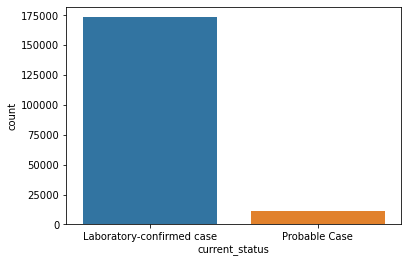

In [20]:
univariate_cat(data= df1, x="current_status")

* combine missing and other

In [21]:
df1["sex"]=df1["sex"].replace(["Unknown","Missing","Other"],"other")
df1["sex"]=df1["sex"].fillna("other")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Female', 'Male', 'other']
Value count and %
:         count percentage
Female  92108     50.02%
Male    91269     49.56%
other     778      0.42%


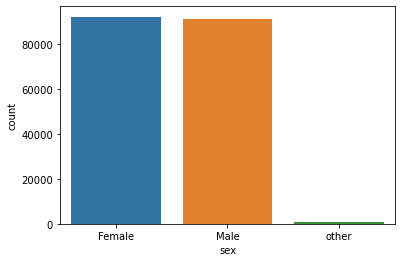

In [22]:
univariate_cat(data= df1, x="sex")

* combine 9 cat into 5 and fill missing value with unknown

In [23]:
df1["age_group"]=df1["age_group"].replace(["0 - 9 Years","10 - 19 Years"],"0-19")
df1["age_group"]=df1["age_group"].replace(["20 - 29 Years","30 - 39 Years"],"20-39")
df1["age_group"]=df1["age_group"].replace(["40 - 49 Years","50 - 59 Years"],"40-59")
df1["age_group"]=df1["age_group"].replace(["60 - 69 Years","70 - 79 Years"],"60-79")
df1["age_group"]=df1["age_group"].replace(["80+ years"],"senior citizen")
df1["age_group"]=df1["age_group"].replace(["Unknown"],"Unknown")
df1["age_group"]=df1["age_group"].fillna("unknown")

Total missing values : 0

Total count of unique categories: 7

Unique categories :
['60-79', '80+ Years', '40-59', '20-39', '0-19', 'Unknown', 'unknown']
Value count and %
:            count percentage
60-79      47197     25.63%
20-39      41544     22.56%
40-59      41171     22.36%
80+ Years  37917     20.59%
0-19       16183      8.79%
Unknown      139      0.08%
unknown        4       0.0%


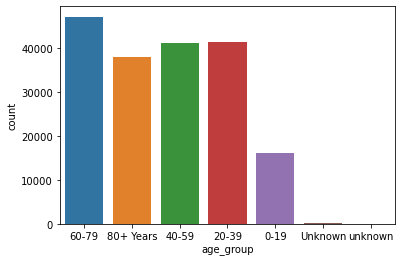

In [24]:
univariate_cat(data= df1, x="age_group")

* combine missing and unknown

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Yes', 'Unknown', 'No']
Value count and %
:          count percentage
No       91217     49.53%
Yes      53384     28.99%
Unknown  39554     21.48%


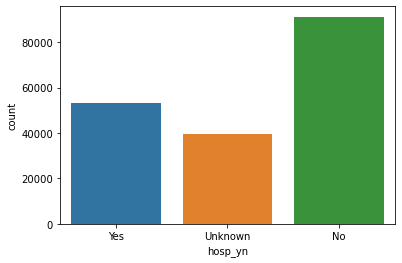

In [25]:
df1['hosp_yn']=df1['hosp_yn'].replace(['Missing'],'Unknown')
univariate_cat(data= df1, x='hosp_yn')

* combine missing and unknown

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Unknown', 'No', 'Yes']
Value count and %
:           count percentage
Unknown  146031      79.3%
No        27584     14.98%
Yes       10540      5.72%


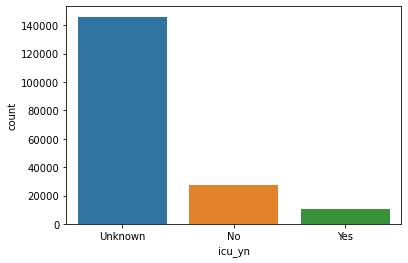

In [26]:
df1['icu_yn']=df1['icu_yn'].replace(['Missing'],'Unknown')
univariate_cat(data= df1, x='icu_yn')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Yes', 'No']
Value count and %
:       count percentage
No   110724     60.13%
Yes   73431     39.87%


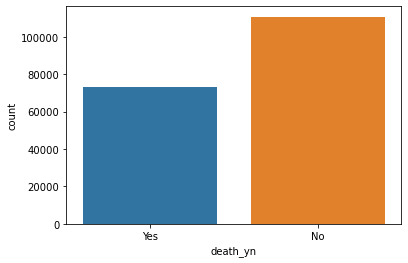

In [27]:
univariate_cat(data= df1, x='death_yn')

* combine missing with unknown

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Unknown', 'Yes', 'No']
Value count and %
:           count percentage
Unknown  123326     66.97%
Yes       42408     23.03%
No        18421      10.0%


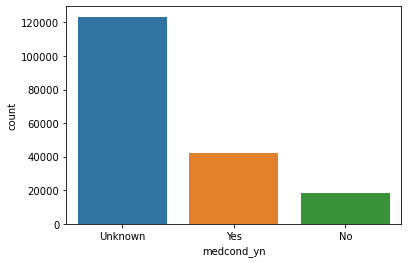

In [28]:
df1['medcond_yn']=df1['medcond_yn'].replace(['Missing'],'Unknown')
univariate_cat(data= df1, x='medcond_yn')

* change date format of date column and extract day,month,year

In [29]:
def date_format(data, x:str):
    x_type=data[x].dtype
    if isinstance(x_type, pd.core.dtypes.dtypes.DatetimeTZDtype):
        x_type=np.datetime64
    if not np.issubdtype(x_type,np.datetime64):
        data[x]=pd.to_datetime(data[x], infer_datetime_format=True)

In [30]:
date_format(data=df1,x='cdc_report_dt')

In [31]:
df1['cdc_report_dt'].dtypes

dtype('<M8[ns]')

In [32]:
df1["cdc_report_dt"].min()

Timestamp('2020-01-01 00:00:00')

In [33]:
df1["cdc_report_dt"].max()

Timestamp('2020-11-19 00:00:00')

In [34]:
df1["month"]=df1["cdc_report_dt"].dt.month
df1["day"]=df1["cdc_report_dt"].dt.day
df1["year"]=df1["cdc_report_dt"].dt.year

In [35]:
df1["month"].value_counts()

6     27973
10    25274
11    24463
7     22130
4     21744
8     20218
9     19368
5     17499
3      5446
2        31
1         9
Name: month, dtype: int64

In [36]:
df1["day"].value_counts()

10    14240
24     8581
13     7563
26     7307
19     7166
5      6925
17     6659
21     6499
18     6462
20     6399
14     6384
16     5989
27     5737
15     5693
12     5564
28     5457
7      5438
9      5323
29     5222
4      5158
1      5145
11     5082
2      5068
3      4821
6      4738
8      4721
30     4563
23     4384
22     4174
25     4144
31     3549
Name: day, dtype: int64

In [37]:
df1["year"].value_counts()

2020    184155
Name: year, dtype: int64

In [38]:
df1.drop(columns=['Unnamed:_0','pos_spec_dt','onset_dt','cdc_report_dt'],inplace=True)

* no missing value

In [39]:
df1.isnull().sum()

current_status                                                         0
sex                                                                    0
age_group                                                              0
hosp_yn                                                                0
icu_yn                                                                 0
death_yn                                                               0
medcond_yn                                                             0
Race_ethnicity_Asian__Non_Hispanic                                     0
Race_ethnicity_Black__Non_Hispanic                                     0
Race_ethnicity_Hispanic_Latino                                         0
Race_ethnicity_Missing                                                 0
Race_ethnicity_Multiple_Other__Non_Hispanic                            0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic    0
Race_ethnicity_Unknown                             

* no outliers

In [40]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Race_ethnicity_Asian__Non_Hispanic,184155.0,0.024876,0.155747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Race_ethnicity_Black__Non_Hispanic,184155.0,0.122098,0.327400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Hispanic_Latino,184155.0,0.142977,0.350051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Missing,184155.0,0.036866,0.188432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Race_ethnicity_Multiple_Other__Non_Hispanic,184155.0,0.037479,0.189934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,184155.0,0.002411,0.049043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Race_ethnicity_Unknown,184155.0,0.214955,0.410792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_White__Non_Hispanic,184155.0,0.412359,0.492260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
month,184155.0,7.447623,2.400948,1.0,3.0,3.0,4.0,4.0,4.0,6.0,7.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
day,184155.0,15.744965,8.478379,1.0,1.0,1.0,2.0,2.0,2.0,9.0,16.0,23.0,28.0,29.0,30.0,30.0,30.0,31.0,31.0


### bivariate analysis
 * cat-cat

In [41]:
pd.crosstab(df1["icu_yn"],df1["death_yn"])

death_yn,No,Yes
icu_yn,,
No,20232,7352
Unknown,89865,56166
Yes,627,9913


In [42]:
pd.crosstab(df1["hosp_yn"],df1["death_yn"])

death_yn,No,Yes
hosp_yn,,
No,80400,10817
Unknown,22457,17097
Yes,7867,45517


In [43]:
pd.crosstab(df1["current_status"],df1["death_yn"],normalize=True)*100

death_yn,No,Yes
current_status,,
Laboratory-confirmed case,56.868399,37.269148
Probable Case,3.257039,2.605414


In [44]:
pd.crosstab(df1["sex"],df1["death_yn"],normalize=True)*100

death_yn,No,Yes
sex,,
Female,31.615758,18.400804
Male,28.208303,21.352665
other,0.301377,0.121094


In [45]:
pd.crosstab(df1["age_group"],df1["death_yn"],normalize=True)*100

death_yn,No,Yes
age_group,,
0-19,8.736119,0.051587
20-39,21.889712,0.669545
40-59,18.129836,4.226874
60-79,9.257419,16.371535
80+ Years,2.040129,18.549591
Unknown,0.071679,0.003801
unknown,0.000543,0.001629


In [46]:
pd.crosstab(df1["medcond_yn"],df1["death_yn"],normalize=True)*100

death_yn,No,Yes
medcond_yn,,
No,9.197144,0.805843
Unknown,42.969238,23.999348
Yes,7.959056,15.069371


* create dummies for non numeric columns

In [47]:
df2=pd.get_dummies(data=df1, drop_first=True)

#### multicollinearity

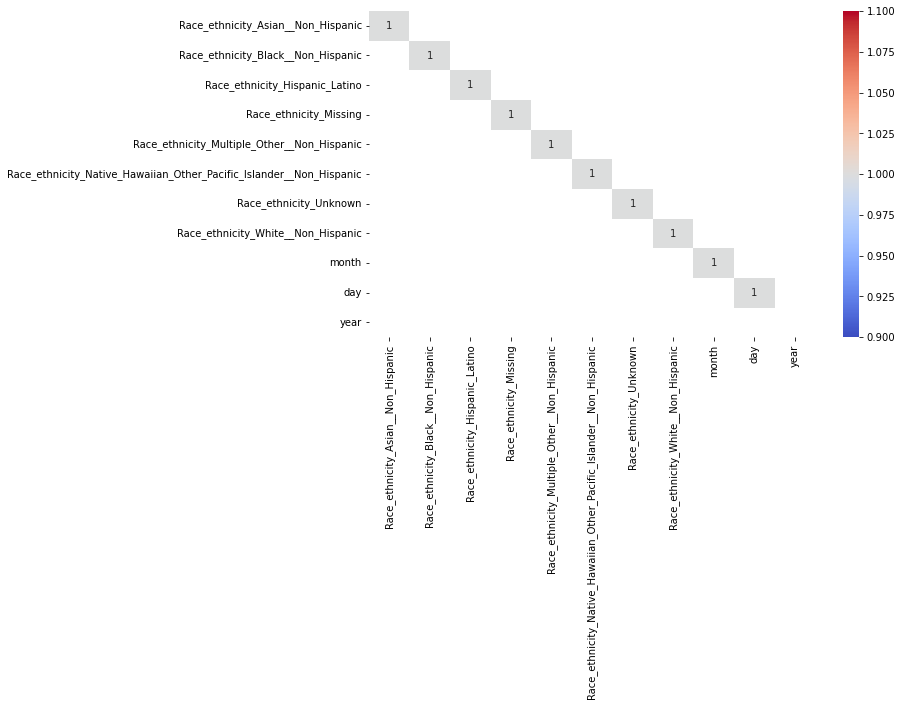

In [48]:
plt.figure(figsize=(10,6))
cr=df1.corr()
cr=cr[abs(cr)>.6]
sns.heatmap(cr,annot=True, cmap="coolwarm")
plt.show()

### model development
 * logistic reg

In [49]:
y=df2['death_yn_Yes']
x=df2.drop('death_yn_Yes',axis=1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=0)

In [51]:
logR=LogisticRegression(max_iter=1000)
logR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
print("train score:", logR.score(x_train, y_train))
print("test score:", logR.score(x_test, y_test))

train score: 0.9019455735873646
test score: 0.9013521096168118


In [53]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [54]:
pd.DataFrame({"act" :y_train, "pred" :pred_train})

,act,pred
84011,0,0
21411,1,1
179589,0,0
73249,1,1
43983,1,1
...,...,...
152315,0,0
176963,0,0
117952,0,0
173685,0,0


### confusion metrix

In [55]:
conf_train=metrics.confusion_matrix(y_train, pred_train)
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,70689,6585
Act_1_pos,6055,45579


In [56]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     77274
           1       0.87      0.88      0.88     51634

    accuracy                           0.90    128908
   macro avg       0.90      0.90      0.90    128908
weighted avg       0.90      0.90      0.90    128908



In [57]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=["pob_0","porb_1"])
prob_train

,pob_0,porb_1
0,0.949775,0.050225
1,0.009860,0.990140
2,0.920426,0.079574
3,0.005002,0.994998
4,0.078472,0.921528
...,...,...
128903,0.975012,0.024988
128904,0.722372,0.277628
128905,0.995286,0.004714
128906,0.766440,0.233560


In [58]:
new_pred_train=np.where(prob_train["porb_1"]>.3,1,0)
print(metrics.classification_report(y_train, new_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     77274
           1       0.83      0.94      0.88     51634

    accuracy                           0.90    128908
   macro avg       0.89      0.90      0.90    128908
weighted avg       0.90      0.90      0.90    128908



In [59]:
new_conf_train=metrics.confusion_matrix(y_train, new_pred_train)
pd.DataFrame(conf_train, columns=['Pred_0_neg','Pred_1_pos'], index=['Act_0_neg','Act_1_pos'])

,Pred_0_neg,Pred_1_pos
Act_0_neg,70689,6585
Act_1_pos,6055,45579


#### ROC AUC

In [60]:
fpr, tpr, thresholds= metrics.roc_curve(y_train, pred_train)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.898758032335935

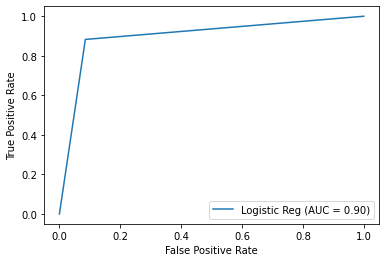

In [61]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name='Logistic Reg')
display.plot()
plt.show()

### decision tree

In [62]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("train accuracy :", round(dt.score(x_train, y_train),3))
print("test accuracy :", round(dt.score(x_test, y_test),3))

train accuracy : 0.953
test accuracy : 0.882


In [63]:
# from sklearn.tree import plot_tree
# fn=x_train.columns
# cn=['yes','no']

# # setting dpi = 300 to make image clearer than default 
# fig, axes=plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=300)

# dt_plot=plot_tree(dt,
#                   feature_names = fn,
#                   class_names = cn,
#                   filled=True);

In [64]:
dt1=DecisionTreeClassifier(max_depth=9)
dt1.fit(x_train, y_train)

print("train accuracy :", round(dt1.score(x_train, y_train),3))
print("test accuracy :", round(dt1.score(x_test, y_test),3))

train accuracy : 0.91
test accuracy : 0.905


In [65]:
dt1=DecisionTreeClassifier(min_samples_split=70)
dt1.fit(x_train, y_train)

print("train accuracy :"+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("test accuracy :" +str(round(dt1.score(x_test, y_test),3)*100)+str('%'))

train accuracy :91.60000000000001%
test accuracy :90.60000000000001%


In [66]:
dt1=DecisionTreeClassifier(min_samples_leaf=150)
dt1.fit(x_train, y_train)

print("train accuracy :"+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str('%'))

train accuracy :90.8%
test accuracy :90.5%


In [67]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)

print("train accuracy :"+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str('%'))

train accuracy :95.3%
test accuracy :88.2%


#### grid search : parameter tuning

In [68]:
params={"criterion" :["gini","enttropy"],
       "max_depth" :[11,13,15,16,17,19],
       "min_samples_split" :[5,7,8,10,15,20,25],
       "min_samples_leaf" :[50,60,70,90,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg,param_grid=params , cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2100 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'enttropy'

  warnings.warn(some_fits_failed_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'enttropy'],
                         'max_depth': [11, 13, 15, 16, 17, 19],
                         'min_samples_leaf': [50, 60, 70, 90, 100],
                         'min_samples_split': [5, 7, 8, 10, 15, 20, 25]},
             verbose=2)

In [69]:
gd_search.best_score_

0.9074611306509273

In [70]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=60, min_samples_split=5)

In [71]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 60,
 'min_samples_split': 5}

In [72]:
dt_f=DecisionTreeClassifier(criterion='gini',
                            max_depth= 15,
                            min_samples_leaf= 60,
                            min_samples_split= 5)
dt_f.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=60, min_samples_split=5)

In [73]:
print("train accuracy :"+str(round(dt_f.score(x_train, y_train),3)*100)+str('%'))
print("train accuracy :"+str(round(dt_f.score(x_test, y_test),3)*100)+str('%'))

train accuracy :91.10000000000001%
train accuracy :90.8%


In [74]:
# from sklearn.tree import plot_tree
# fn=x_train.columns
# cn=['yes','no']

# # setting dpi = 300 to make image clearer than default 
# fig, axes=plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=200)

# dt2_plot=plot_tree(dt_f,
#                   feature_names = fn,
#                   class_names = cn,
#                   filled=True);

#### feature importance

In [75]:
dt_f.feature_importances_

array([0.00000000e+00, 4.03748216e-04, 7.21379778e-04, 1.49297756e-04,
       3.44410352e-05, 0.00000000e+00, 5.82047102e-03, 2.18511967e-03,
       3.12815731e-02, 1.06330112e-02, 0.00000000e+00, 4.08534960e-03,
       2.78771739e-03, 2.04324170e-06, 1.31540232e-02, 1.29178679e-02,
       7.95504580e-02, 2.87987386e-01, 0.00000000e+00, 0.00000000e+00,
       3.96906322e-02, 4.85372330e-01, 7.55041066e-03, 8.05387229e-03,
       3.99906864e-03, 3.61979973e-03])

In [76]:
important_feature=pd.DataFrame({"variable":x_train.columns,
             "imp": dt_f.feature_importances_}).sort_values(by="imp",ascending=False)
important_feature

,variable,imp
21,hosp_yn_Yes,0.485372
17,age_group_80+ Years,0.287987
16,age_group_60-79,0.079550
20,hosp_yn_Unknown,0.039691
8,month,0.031282
14,age_group_20-39,0.013154
15,age_group_40-59,0.012918
9,day,0.010633
23,icu_yn_Yes,0.008054
22,icu_yn_Unknown,0.007550


In [77]:
important_feature[important_feature["imp"]>0.01]["variable"].unique()

array(['hosp_yn_Yes', 'age_group_80+ Years', 'age_group_60-79',
       'hosp_yn_Unknown', 'month', 'age_group_20-39', 'age_group_40-59',
       'day'], dtype=object)

In [78]:
x_train1=x_train[['hosp_yn_Yes', 'age_group_80+ Years', 'age_group_60-79',
       'hosp_yn_Unknown', 'month', 'age_group_20-39', 'age_group_40-59']]
x_test1=x_test[['hosp_yn_Yes', 'age_group_80+ Years', 'age_group_60-79',
       'hosp_yn_Unknown', 'month', 'age_group_20-39', 'age_group_40-59']]

In [79]:
dt_f=DecisionTreeClassifier(criterion="entropy",max_depth=11,
                           min_samples_leaf=60,
                           min_samples_split=5)
dt_f.fit(x_train1,y_train)
print("train accuracy :", round(dt_f.score(x_train1,y_train),3))
print("test accuracy :",round(dt_f.score(x_test1,y_test),3))

train accuracy : 0.9
test accuracy : 0.899


In [80]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [81]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [82]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    roc1=metrics.roc_auc_score(act,pred)
    result={"accuracy":ac1, "recall":rc1, "precision":pc1,"f1 score":f1,"auc":roc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

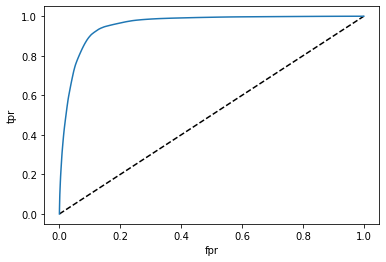

{'accuracy': 0.9000217209172433,
 'recall': 0.9069605298834101,
 'precision': 0.8527879957752121,
 'f1 score': 0.8790404324811353,
 'auc': 0.9011728911808023}

In [83]:
classification_eva(y_train, pred_train, probs=prob_train_1)

### random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
print("train accuracy :", rf.score(x_train, y_train))
print("test accuracy :", rf.score(x_test, y_test))

train accuracy : 0.9526173705278183
test accuracy : 0.8954875377848571


In [ ]:
import time
tic=time.time()
params={"n_estimators" :[100,150],
       "criterion":["gini","entropy"],
       "max_depth":[7,9,11,13],
       "min_samples_split":[50,100,150],
       "min_samples_leaf":[5,10,15,20],
       "max_features":["sqrt","log2"],
       "bootstrap":[True]
       }
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1,param_grid=params,cv=5,n_jobs=-1,verbose=1)
gs_rf.fit(x_train,y_train)
toc=time.time()
print("\n total time taken",toc-tic)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [ ]:
gs_rf.best_score_

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.best_estimator_

In [ ]:
RandomForestClassifier(n_estimators=,criterion=,
                      max_depth=,
                      min_samples_split=,
                      min_samples_leaf=,
                      max_features="",
                      bootstrap=)

In [ ]:
rff.fit(x_train,y_train)

In [ ]:
print("train accuracy :",rff.score(x_train,y_train))
print("test accuracy :", rff.score(x_test,y_test))

In [ ]:
pd.DataFrame({"var":x_train.columns, "imp":rrf.feature_importances_}).sort_values(by="imp",ascending=True)

### model evaluation

In [ ]:
pred_train=rff.predict(x_train)
pred_test=rff.predict(x_test)


In [ ]:
prob_train_1=rff.predict_proba(x_train)[:,1]
prob_test_1= rff.prdict_proba(x_test)[:,1]

In [ ]:
classification_eva(act=y_train, pred=pred_train, probs=prob_train_1)

In [ ]:
classification_eva(y_test,pred_test)